In [1]:
#Import packages
import requests
import io
import urllib.request
import flipp_extracter
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Information needed for data extraction
item_name = 'apple'
zip_code = 60565

In [3]:
#results list of dictionarys of query items
Output = flipp_extracter.search(item_name, zip_code)   

In [4]:
display(len(Output))

127

In [5]:
# view dictionary 
Output[0]['item'].items()

dict_items([('id', 537536022), ('flyer_id', 3850927), ('flyer_valid_from', '2020-12-30T00:00:00-05:00'), ('flyer_valid_to', '2021-01-26T23:59:59-05:00'), ('brand', None), ('display_type', 1), ('merchant', 'Walmart'), ('merchant_id', 2175), ('merchant_logo', 'http://images.wishabi.net/merchants/2175/1399558010/medium'), ('name', 'Honeycrisp Apples'), ('image_url', 'http://f.wishabi.net/page_item_supplemental_infos/209112597/1608574047/extra_large'), ('cutout_image_url', 'http://f.wishabi.net/page_items/209112597/1609802877/extra_large.jpg'), ('media', []), ('description', None), ('current_price', ''), ('current_price_range', None), ('pre_price_text', None), ('category', ''), ('price_text', None), ('sale_story', 'Everyday Low Price'), ('original_price', None), ('original_price_range', None), ('in_store_only', True), ('disclaimer_text', 'All items sold separately.'), ('flyer_disclaimer_text', ''), ('valid_from', None), ('valid_to', None), ('timezone', -300), ('sku', None), ('ttm_label', '

In [6]:
def select_df(list_dics_all):
    '''
    Results a datafram of selected items reading a list of 
    dictionaries of extracted items.
    '''
    #Reading data from Output dictionary
    selected_cols = ['brand', 'merchant', 'name', 'category', 'description', 
                                           'current_price', 'price_text', 'percent_off','image_url','cutout_image_url']
    df_all_items = pd.DataFrame(columns = selected_cols) # dataframe from selected items

    list_dic_selected_items =[]  # list of dictionaries with selected item desriptions only


    for i in range(len(Output)):
        items_dict = Output[i]['item']
        selected_dict = {}

        for key in items_dict:
            if key in selected_cols:
                selected_dict[key] = items_dict[key]                   
        list_dic_selected_items.append(selected_dict)   #update list with dictinaries for each group
    df_all_items = df_all_items.append(list_dic_selected_items, True)   # append list to dataframe 
    return df_all_items

In [7]:
df_sel = select_df(Output)

In [8]:
df_sel.tail(20)

,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url
107,Apple®,Staples,"Apple® Watch Series 6 GPS, 40 mm, blue",,24463336-blue,349.0,None,13.0,http://f.wishabi.net/page_items/211561370/1610...,http://f.wishabi.net/page_items/211561370/1610...
108,Apple®,Staples,Apple® watch magnetic USB charging cable,,24442496-1 ft.,29.0,None,NaN,http://f.wishabi.net/page_items/211561378/1610...,http://f.wishabi.net/page_items/211561378/1610...
109,Apple®,Staples,Apple® AirPods® with charging case,,24395231,129.0,None,19.0,http://f.wishabi.net/page_pdf_images/11225261/...,http://f.wishabi.net/page_items/211561352/1610...
110,Apple®,Staples,Apple® Watch magnetic USB charging cable,,24442497-3 ft.,29.0,None,NaN,http://f.wishabi.net/page_pdf_images/11225259/...,http://f.wishabi.net/page_items/211561377/1610...
111,Apple®,Staples,Apple® Watch black sport band,,24463337-44 mm,49.0,None,NaN,http://f.wishabi.net/page_items/211561365/1610...,http://f.wishabi.net/page_items/211561365/1610...
112,Apple®,Staples,Apple® Watch black sport band,,24463336-40 mm,49.0,None,NaN,http://f.wishabi.net/page_items/211561363/1610...,http://f.wishabi.net/page_items/211561363/1610...
113,Apple®,Staples,Apple® AirPods® with wireless charging case,,24395234,169.0,None,15.0,http://f.wishabi.net/page_items/211561374/1610...,http://f.wishabi.net/page_items/211561374/1610...
114,Apple®,Staples,Apple® 20W USB-C power adapter,,24468900,19.0,None,NaN,http://f.wishabi.net/page_pdf_images/11225259/...,http://f.wishabi.net/page_items/211561375/1610...
115,Apple®,Staples,"Apple® smart keyboard case for 11"" iPad Pro™",,24453929,190.0,None,NaN,http://f.wishabi.net/page_pdf_images/11225259/...,http://f.wishabi.net/page_items/211561384/1610...
116,Apple®,Staples,Apple® AirPods® with charging case,,24395231,129.0,None,19.0,http://f.wishabi.net/page_pdf_images/11225259/...,http://f.wishabi.net/page_items/211561373/1610...


In [9]:
len(df_sel['current_price'])

127

In [10]:
# for i in range(len(df_sel)):
#     if df_sel['description'][i] != None:
#         desc_text = df_sel['description'][i]
#         print(desc_text)

In [11]:
len(df_sel[df_sel['current_price'] == ''])

35

In [12]:
df_price = df_sel[df_sel['current_price'] != '']

In [13]:
len(df_price)

92

In [14]:
df_price.head()

,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url
1,None,Meijer,"Organic Fuji, Gala or Granny Smith Apples",,3 lb. bag.,3.99,None,NaN,http://f.wishabi.net/page_items/210645012/1610...,http://f.wishabi.net/page_items/210645012/1610...
3,None,Hy-Vee,Granny Smith or Gala apples,,None,0.99,lb.,NaN,http://f.wishabi.net/page_items/210756508/1610...,http://f.wishabi.net/page_items/210756508/1610...
5,None,Trader Joe's,Envy Apples,,Apples are often the objects of envy in the la...,1.29,None,NaN,http://f.wishabi.net/page_pdf_images/11218866/...,http://f.wishabi.net/page_items/211440787/1610...
6,None,Jewel-Osco,"Organic Fuji, Gala, Granny Smith or Pink Lady ...",,None,2.49,lb.,NaN,http://f.wishabi.net/page_pdf_images/11147475/...,http://f.wishabi.net/page_items/209963505/1609...
7,None,Jewel-Osco,Organic Honeycrisp Apples,,None,3.49,lb.,NaN,http://f.wishabi.net/page_items/209963506/1609...,http://f.wishabi.net/page_items/209963506/1609...


In [15]:
df_sorted = df_price.sort_values(by='current_price')

In [16]:
df_sorted.head()


,brand,merchant,name,category,description,current_price,price_text,percent_off,image_url,cutout_image_url
68,Signature Select,Jewel-Osco,Signature Select Apple Juice,,"64 oz., Select Varieties",0.88,None,NaN,http://f.wishabi.net/page_pdf_images/11207418/...,http://f.wishabi.net/page_items/211269459/1610...
3,None,Hy-Vee,Granny Smith or Gala apples,,None,0.99,lb.,NaN,http://f.wishabi.net/page_items/210756508/1610...,http://f.wishabi.net/page_items/210756508/1610...
5,None,Trader Joe's,Envy Apples,,Apples are often the objects of envy in the la...,1.29,None,NaN,http://f.wishabi.net/page_pdf_images/11218866/...,http://f.wishabi.net/page_items/211440787/1610...
11,None,Meijer,"Bulk Fuji, Gala or Granny Smith Apples",,None,1.29,lb,NaN,http://f.wishabi.net/page_items/210603737/1610...,http://f.wishabi.net/page_items/210603737/1610...
8,None,ALDI,Washington Cosmic Crisp Apples,,None,1.49,Per Lb.,NaN,http://f.wishabi.net/page_items/210115303/1610...,http://f.wishabi.net/page_items/210115303/1610...


In [17]:
df_sorted['current_price'].unique()

array(['0.88', '0.99', '1.29', '1.49', '1.98', '1.99', '10.0', '100.0',
       '102.0', '11.5', '129.0', '129.99', '14.99', '150.0', '169.0',
       '17.98', '19.0', '19.99', '190.0', '199.99', '2.49', '2.5', '2.99',
       '209.0', '21.74', '229.99', '249.0', '279.0', '279.99', '28.0',
       '29.0', '3.0', '3.49', '3.99', '30.0', '349.0', '35.0', '379.0',
       '399.99', '4.0', '4.94', '4.95', '4.98', '4.99', '49.0', '499.99',
       '5.0', '51.0', '59.0', '599.99', '6.0', '6.25', '6.75', '6.98',
       '6.99', '7.0', '7.5', '7.75', '8.98', '9.87', '9.98'], dtype=object)

In [18]:
df_sorted = df_sorted.reset_index()

In [19]:
lowest_price = df_sorted['current_price'].min()
highest_price = df_sorted['current_price'].max()

In [20]:
print("Lowest price: ", lowest_price)
print("Highest price: ", highest_price)

Lowest price:  0.88
Highest price:  9.98


'Jewel-Osco'

'0.88'

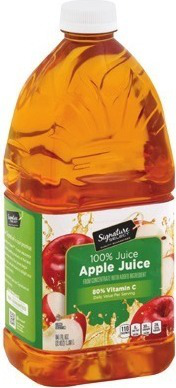

In [21]:
#Lowest price item
store_name = df_sorted['merchant'][0]
current_price = df_sorted['current_price'][0]
item_image = df_sorted['image_url'][0]
#read the image
with urllib.request.urlopen(item_image ) as url:
     ff = io.BytesIO(url.read())

img = Image.open(ff)
display(store_name, current_price )
display(img)